In [0]:
# Change directory to VSCode workspace root so that relative path loads work correctly. Turn this addition off with the DataScience.changeDirOnImportExport setting
# ms-python.python added
import os
try:
	os.chdir(os.path.join(os.getcwd(), '..'))
	print(os.getcwd())
except:
	pass


 # Barnes-Hut t-Distributed Stochastic Neighbour Embedding (t-SNE)

 Following the scikit-learn `TSNE` example [here](https://scikit-learn.org/stable/auto_examples/manifold/plot_lle_digits.html#sphx-glr-auto-examples-manifold-plot-lle-digits-py).

In [1]:

from time import time
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.text as txt
import matplotlib.cm as cm
from mpl_toolkits.mplot3d import Axes3D
from sklearn import (datasets, manifold)


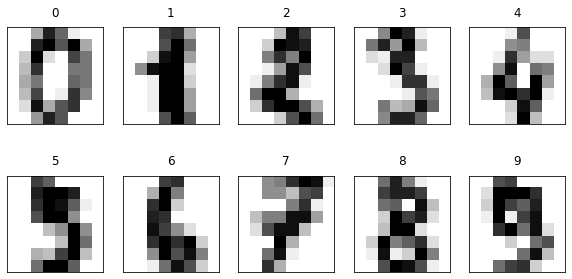

In [2]:
# Load MNIST data (data: images, target: labels)
data, target = datasets.load_digits(n_class = 10, return_X_y = True)
n_samples, n_features = data.shape

# Show data
fig = plt.figure(figsize = (5*2, 2*2 + 1))
k = 1
for i in range(5):
    for j in range(2):
        ax = fig.add_subplot(2, 5, k)
        img = np.reshape(data[k - 1, :], (8, 8))
        ax.matshow(img, cmap = 'gray_r')
        ax.set_aspect(1)
        plt.setp(ax, title = f'{target[k - 1]}')
        # ax.set_axis_off()
        ax.tick_params(axis = 'both', top = False, bottom = False, left = False, right = False, labelleft = False, labeltop = False)

        k += 1


In [3]:

# Visualization parameters
n_neighbours = 30
n_dim_emb = 3

# tSNE
tsne = manifold.TSNE(n_components = n_dim_emb, perplexity = n_neighbours, init = 'pca', random_state = 0, method = 'barnes_hut')
t0 = time()
data_tsne = tsne.fit_transform(data)
t1 = time() - t0

print(f'Elapsed time for tSNE: {t1} s')


Elapsed time for tSNE: 14.546992301940918 s


In [4]:
# Plot result
def plot_emb(data, target):

    # Tableau colormap
    n_col = (np.unique(target)).size
    col = np.asarray([cm.get_cmap('tab10')(i) for i in range(n_col)])

    # Plot
    fig = plt.figure(figsize = (6, 6))
    ax = fig.add_subplot(111, projection = '3d')
    plt.setp(ax, title = 'tSNE Plot of the MNIST Dataset')
    # ax.scatter(data[:, 0], data[:, 1], data[:, 2], s = 5, c = target, cmap = 'tab10', label = [0, 1, 2, 3, 4])
    for i in range(10):
        j = (target == i)
        ax.scatter(data[j, 0], data[j, 1], data[j, 2], s = 5, cmap = col[i, :3], label = f'{i}')
        
    # ax.set_axis_off()
    ax.legend(loc = 'upper left')
    


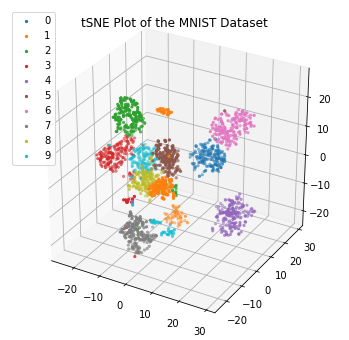

In [5]:
# Plot embedding
t0 = time()
plot_emb(data_tsne, target)
t1 = time() - t0


